## <span style="color:blue">  Numerical exercises 1</span>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15
})

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$(see below: Computing statistical uncertainties).

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

### Soluzione

#### Valor medio e varianza
In questo esercizio testiamo l'efficienza del generatore di numeri pseudo-casuali (PRNG) che verrà utilizzato in tutti gli esercizi successivi. Il generatore è implementato in una classe chiamata ```Random```, il cui metodo principale è ```Rannyu()```, che restituisce numeri pseudo-casuali nell'intervallo $[0,1)$.

Per verificare l’efficienza del PRNG, dobbiamo controllare che il valor medio delle estrazioni converga a $1/2$ e che la deviazione standard converga a $1/\sqrt{12}$. A tale scopo, utilizziamo il __data blocking__, che sarà impiegato anche nella maggior parte degli esercizi futuri. Questo metodo consiste nel suddividere l’insieme dei valori su cui calcolare il valor medio in blocchi, calcolare la media all'interno di ciascun blocco, e infine considerare la media dei risultati ottenuti per ogni blocco.

Nel nostro caso, generiamo $M = 10^5$ numeri tramite il generatore e li suddividiamo in $N = 100$ blocchi, ognuno contenente $L = M/N$ numeri. Calcoliamo la media dei valori in ciascun blocco e indichiamo queste medie con $A_i$, con $i = 1, ..., N$:
$$ A_i = \frac{1}{L} \sum_{j=1}^N r_j $$ 

con $L = M/N$, numero di elementi in ciascun blocco e $r_j$ numero casuale estratto di cui sto calcolando il valor medio.

Valutiamo anche $A_i^2$ che ci servirà per valutare l'incertezza statistica della media. Quindi calcoliamo: 
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
e l'incertezza statistica:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

Infine, rappresentiamo graficamente l’andamento della media progressiva rispetto al numero di blocchi, confrontandola con il valore atteso. I risultati mostrano che il valor medio dei numeri generati converge effettivamente a $1/2$ e la deviazione standard a $1/\sqrt{12}$.

Osserviamo inoltre che, per ogni misura, il metodo del data blocking consente di stimare l’errore statistico, che tende a diminuire all’aumentare del numero di blocchi. Di conseguenza, maggiore è il numero di blocchi utilizzati, minore sarà l’errore sulla stima della media, rendendo il risultato più affidabile.

Parametri _data blocking_:
- $M = 10^5$ (numero di estrazioni totali)
- $N = 10^2$ (numero di blocchi)

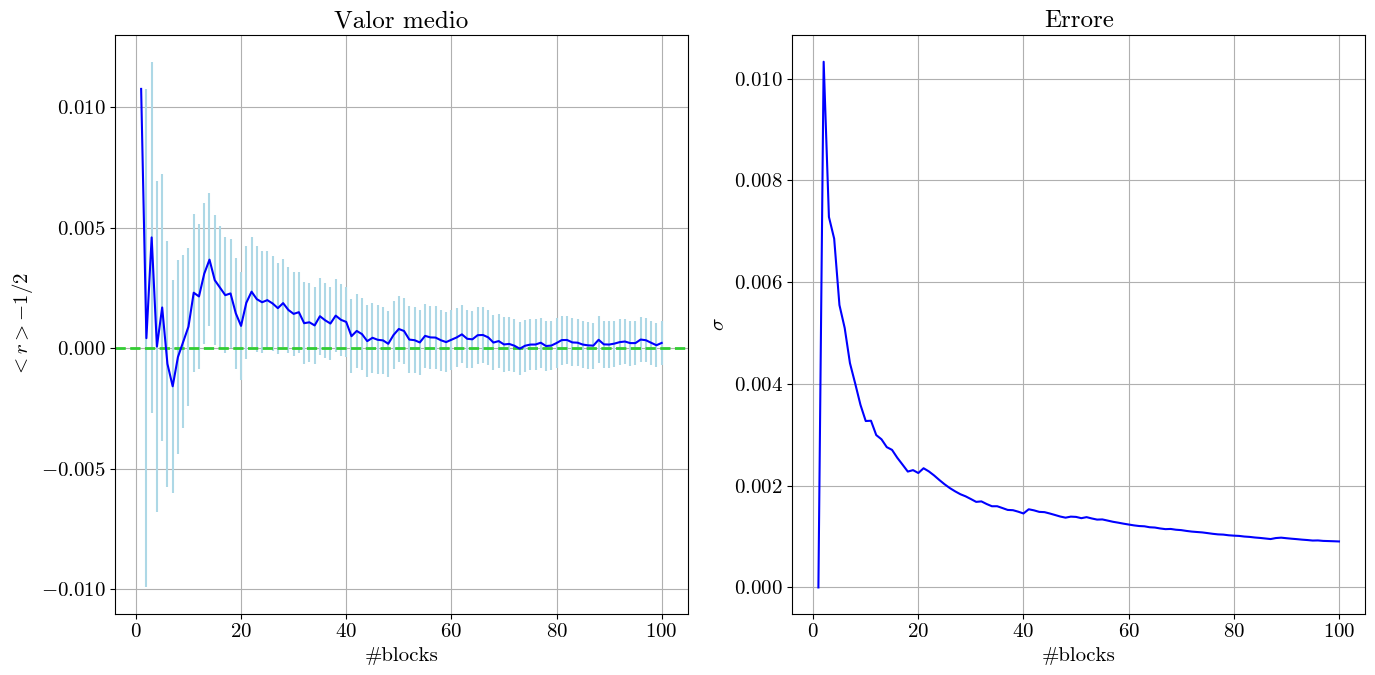

In [37]:
# mean value of r - 1/2 as a function of the number of throws
data = np.loadtxt("es1_1/data.dat")
x = data[:,0]
y = data[:,1]
err = data[:,2]

plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plt.errorbar(x,y-0.5,err, ecolor= 'lightblue' ,color='blue')
plt.axhline(y=0, color='limegreen', linestyle='--', linewidth = 2)
plt.xlabel('#blocks')
plt.ylabel('$<r>-1/2$')
plt.grid(True)
plt.title("Valor medio")

plt.subplot(1,2,2)
plt.plot(x, err, color='blue')
plt.xlabel('#blocks')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.title("Errore")
plt.tight_layout()
plt.show()

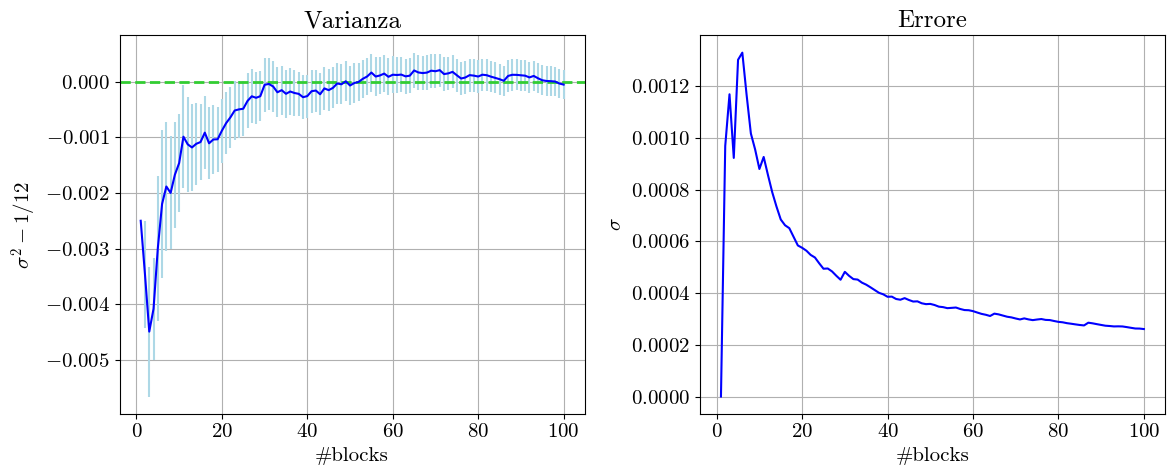

In [38]:
#mean value of (r-1/2)^2 as a function of the number of throws
data_sigma = np.loadtxt("es1_1/data_sigma.dat")
x1 = data_sigma[:,0]
y1 = data_sigma[:,1]
err1 = data_sigma[:,2]


plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.errorbar(x1,y1-1/12,err1, ecolor= 'lightblue' ,color='blue')
plt.axhline(y=0, color='limegreen', linestyle='--', linewidth = 2)
plt.xlabel('#blocks')
plt.ylabel('$\sigma^2-1/12$')
plt.grid(True)
plt.title("Varianza")

plt.subplot(1,2,2)
plt.plot(x1, err1, color='blue')
plt.xlabel('#blocks')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.title("Errore")
plt.tight_layout()
plt.show()

#### $\chi^2$ test 
Vogliamo dimostrare che i numeri estratti seguono una distribuzione uniforme. Calcoliamo l'errore tra il valore osservato e quello aspettato usando il test del $\chi^2$. Per far questo dividiamo l'intervallo [0,1] in $M$ sottointervalli identici e  dopo $n$ estrazioni ci aspettiamo di trovare in ogni sottointervallo $n/M$ valori, in accordo con la distribuzione uniforme.
Quindi il $\chi^2$ è:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
Ci aspettimao che in media $(n_i - n/M)^2 \simeq n/M$ e quindi che $\chi^2 \simeq 100$; cioè il numero di subintervalli.

Per implementare questo calcolo estraiamo $n$ numeri pseudo casuali e controlliamo in quale intervallo cadono e in seguito valutiamo il $\chi^2$. Ripetiamo questo procedimento per $N$ volte e otteniamo un istogramma con il $\chi^2$ ottenuto che confrontiamo con il valore atteso che è $\chi^2 = 100$. IL valore atteso è $100$ perchè affinche ci sia buon accordo tra i dati estratti e il modello che è la distribuzione uniforme si deve avere $\chi^2_{ridotto} = 1$, ma $\chi^2_{ridotto} = \frac{ \chi^2}{gdl}$ e in questo caso il numero di gradi di libertà è $100$, cioe il numero di intervalli, quindi $\chi^2$ deve essere $= 100$.


Dettagli della simulazione:
- numero di sottointervalli $(M) = 10^2$
- numero di tiri per ripetizione $(n) = 10^5$

- numero di ripetizioni $(N) = 10^2$

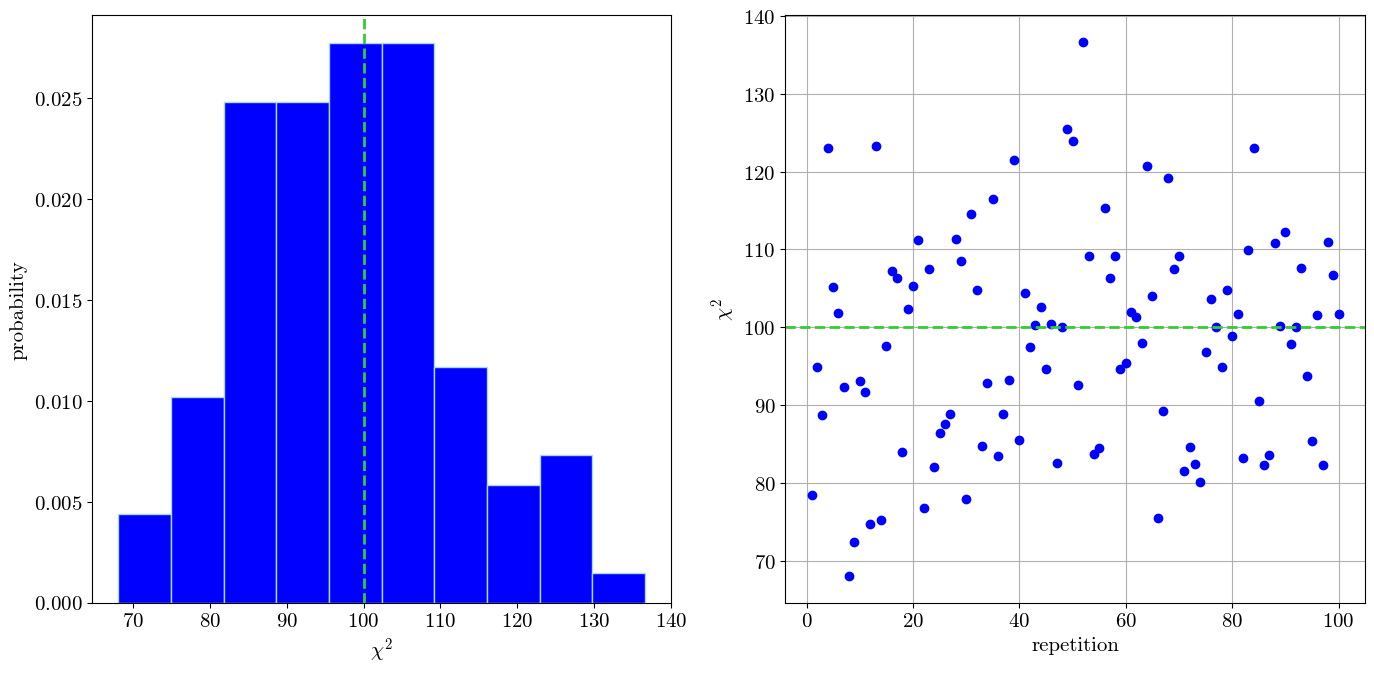

In [39]:
# lui la chievava con M = 100 blocchi e n = 10000 throws per blocco

chi_test = np.loadtxt("es1_1/chi_test_100.dat")  #carico i dati del chi test
j = chi_test[:,0]
x = chi_test[:,1]

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(x, bins = 10, edgecolor= 'lightblue', color='blue', density=True)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.axvline(x=100, color='limegreen', linestyle='--', linewidth = 2)

plt.subplot(1,2,2)
plt.scatter(j,x, color='blue')
plt.xlabel('repetition')
plt.ylabel('$\chi^2$')
plt.axhline(y=100, color='limegreen', linestyle='--', linewidth = 2)
plt.grid(True)
plt.tight_layout()
plt.show()


- numero di ripetizioni $(N) = 10^3$

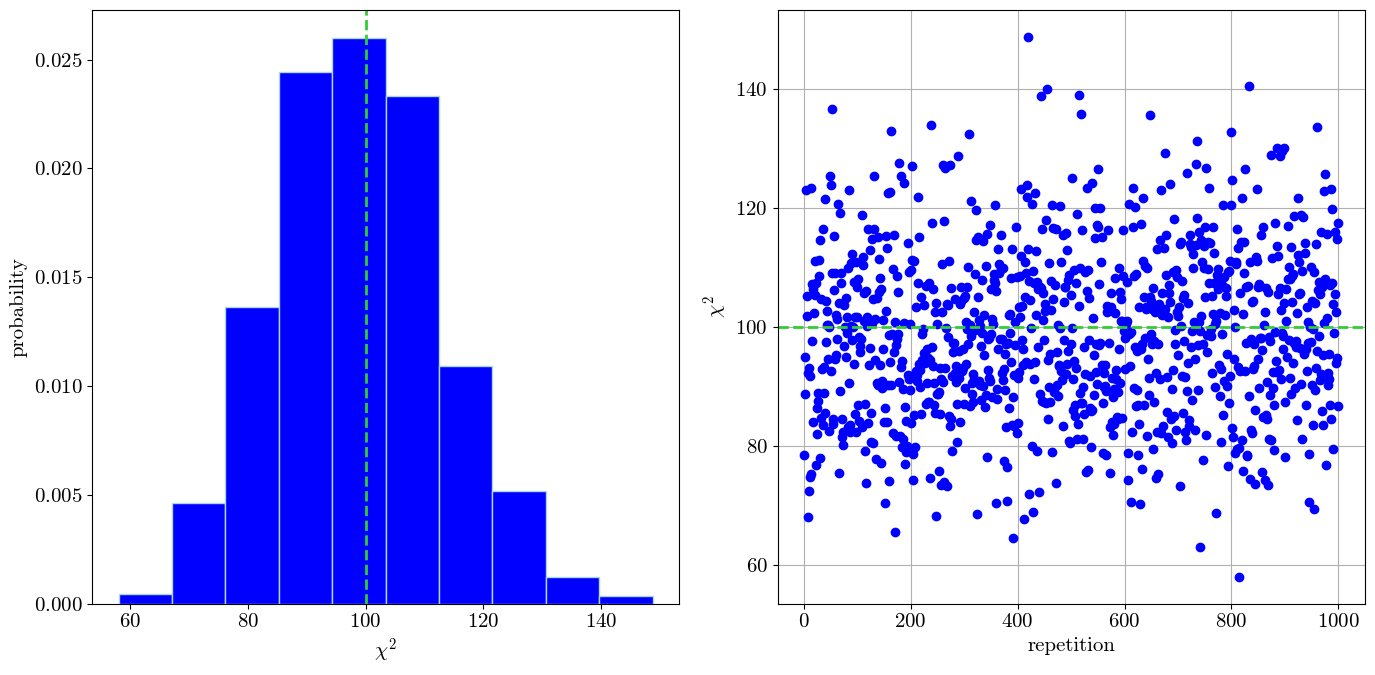

In [40]:
#chi test with 1000 repetitions
chi_test = np.loadtxt("es1_1/chi_test_1000.dat")  #carico i dati del chi test
j_2 = chi_test[:,0]
x_2 = chi_test[:,1]

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(x_2, bins = 10, edgecolor= 'lightblue', color='blue', density=True)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.axvline(x=100, color='limegreen', linestyle='--', linewidth = 2)

plt.subplot(1,2,2)
plt.scatter(j_2,x_2, color='blue')
plt.xlabel('repetition')
plt.ylabel('$\chi^2$')
plt.axhline(y=100, color='limegreen', linestyle='--', linewidth = 2)
plt.grid(True)
plt.tight_layout()
plt.show()

- numero di ripetizioni $(N) = 10^4$

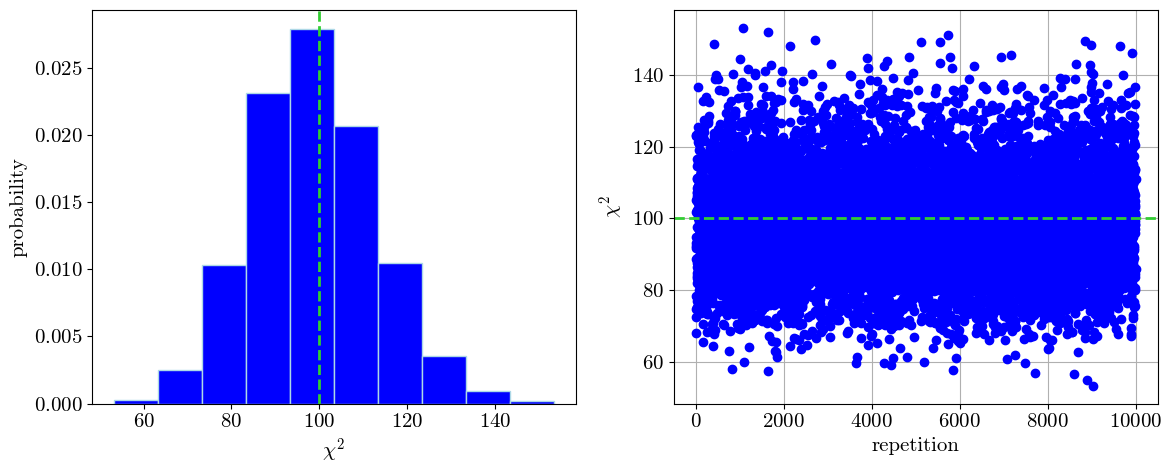

In [41]:


chi_test = np.loadtxt("es1_1/chi_test_10000.dat")  #carico i dati del chi test
j = chi_test[:,0]
x = chi_test[:,1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x, bins = 10, edgecolor= 'lightblue', color='blue', density=True)
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.axvline(x=100, color='limegreen', linestyle='--', linewidth = 2)

plt.subplot(1,2,2)
plt.scatter(j,x, color='blue')
plt.xlabel('repetition')
plt.ylabel('$\chi^2$')
plt.axhline(y=100, color='limegreen', linestyle='--', linewidth = 2)
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Soluzione

Aggiungiamo nel file ```random.cpp``` l'implementazione dell'estrazione pseudo-casuale che segue la distribuzione esponenziale e quella di Cauchy-Lorentz. 
Per far questo sfruttiamo il metodo dell'inversione della funzione cumulativa che ci permette di campionare una generica distribuzione di probabilità $p(x)$ di cui si sappia calcolare la primitiva 

$$F(x) = \int_{-\infty}^x p(x) dt$$

avremo che $0 \leq F(x) \leq 1$ dato che $F(x)$ è l'integrale di una distribuzione di probabilità, quindi definendo $y = F(x)$ avremo che $x = F^{-1}(y)$. Estranedo casualmente $y$ otteniamo $x$ che è segue la distribuzione di probabilità di partenza $p(x)$.
In particolare nel nostro caso abbiamo:
- distribuzione esponenziale: 
$$ p(x) = \lambda \exp(-\lambda x) $$
$$ x = - \frac{1}{\lambda} ln(1-y) $$
- distribuzione di Cauchy-Lorentz:
$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
$$ x = \mu + \Gamma tan(\pi(y-\frac{1}{2}))$$


Eseguiamo per ogni tipo di generatore delle simulazioni che estraggano $N= 1, 2, 10, 100$ numeri casuali per $10^4$ volte e creiamo degli istogrammi con i valori ottenuti.
Facciamo un fit delle distribuzioni ottenute per $N = 100$, in particolare fittiamo l'esponenziale e l'estrazione uniforme con una gaussiana, mentre l'estrazione che segue la distribuzione di Lorentz con una lorenziana.

In [42]:
from scipy.optimize import curve_fit
import seaborn as sns

histo1 = np.loadtxt("es1_2/histo1.dat") 
histo2 = np.loadtxt("es1_2/histo2.dat") 
histo10 = np.loadtxt("es1_2/histo10.dat") 
histo100 = np.loadtxt("es1_2/histo100.dat") 
# Definiamo la funzione gaussiana
def gauss(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x-mu) / sigma) ** 2)
# definiamo la funzione lorentziana
def lorentziana(x, A, mu, gamma):
    return A* gamma / (math.pi * ((gamma)**2 + (x - mu) ** 2))

[13.77552307  0.50002138 -0.02897114]


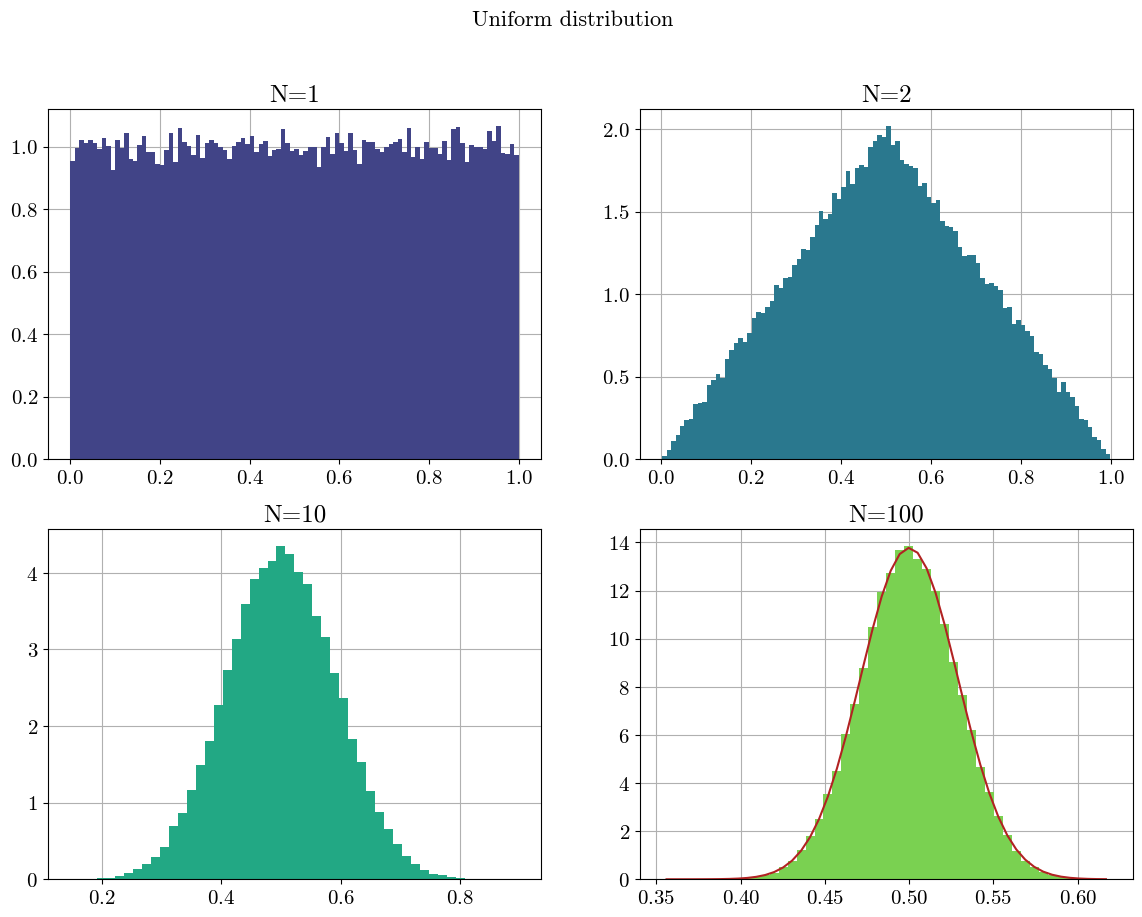

In [43]:
# uniform distribution
unif1= histo1[:,0]
unif2 = histo2[:,0]
unif10 = histo10[:,0]
unif100 = histo100[:,0]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Uniform distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(unif1, bins=100, color=colors[0], density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(unif2, bins=100, color=colors[1], density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(unif10, bins=50, color=colors[2], density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n1, bins1, _ = axs[1,1].hist(unif100, bins=50, color=colors[3], density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit gaussiano per N = 100
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
popt1, pcov1 = curve_fit(gauss, bin_centers1, n1)
plt.plot(bin_centers1, gauss(bin_centers1, *popt1), color='firebrick', label='fit')
print(popt1)
plt.grid(True)

[ 4.01409171  0.99530994 -0.09916635]


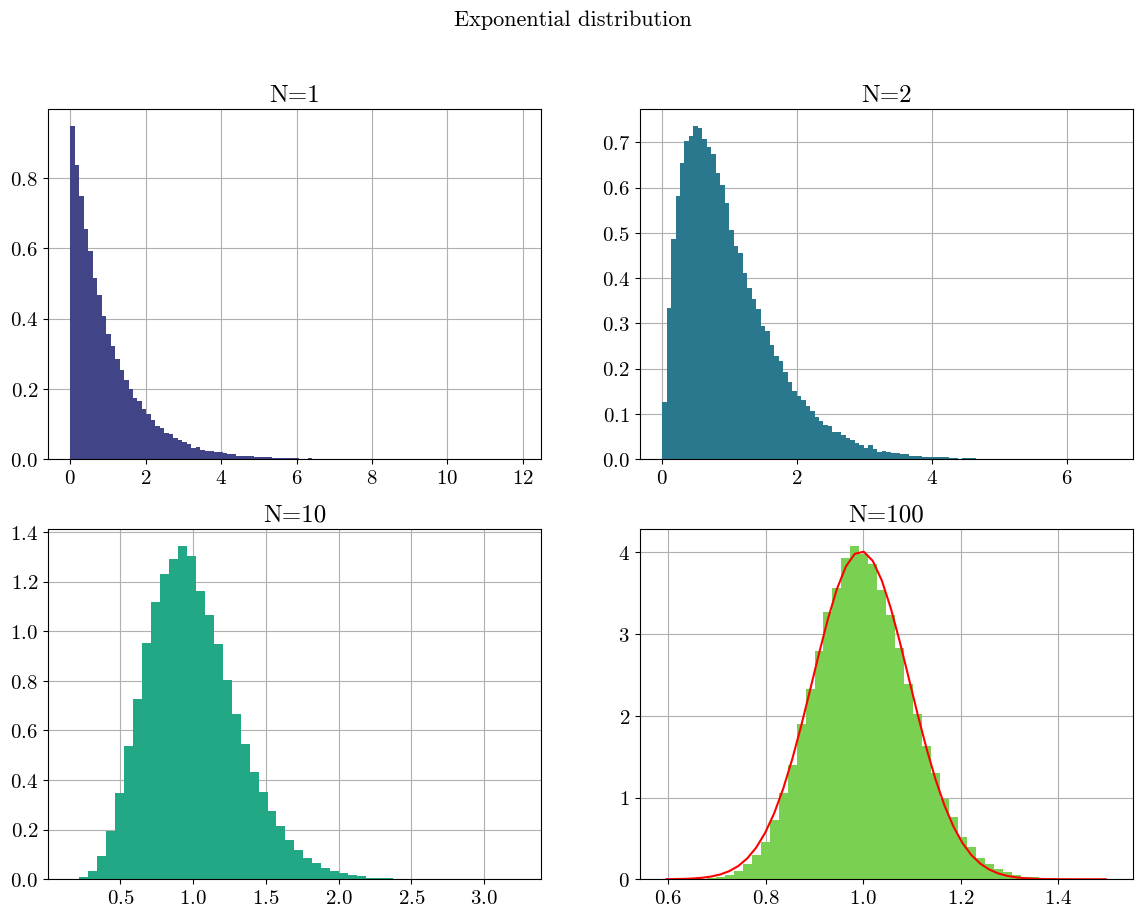

In [44]:
#exponential distribution
exp1= histo1[:,1]
exp2 = histo2[:,1]
exp10 = histo10[:,1]
exp100 = histo100[:,1]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exponential distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(exp1, bins=100, color=colors[0], density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(exp2, bins=100, color=colors[1], density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(exp10, bins=50, color=colors[2], density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n2, bins2, _ = axs[1,1].hist(exp100, bins=50, color=colors[3], density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit gaussiano per N = 100
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
popt2, pcov2 = curve_fit(gauss, bin_centers2, n2)
plt.plot(bin_centers2, gauss(bin_centers2, *popt2), color='r', label='fit')
print(popt2)
plt.grid(True)

plt.show()

[1.06765173 0.00701609 1.00624247]


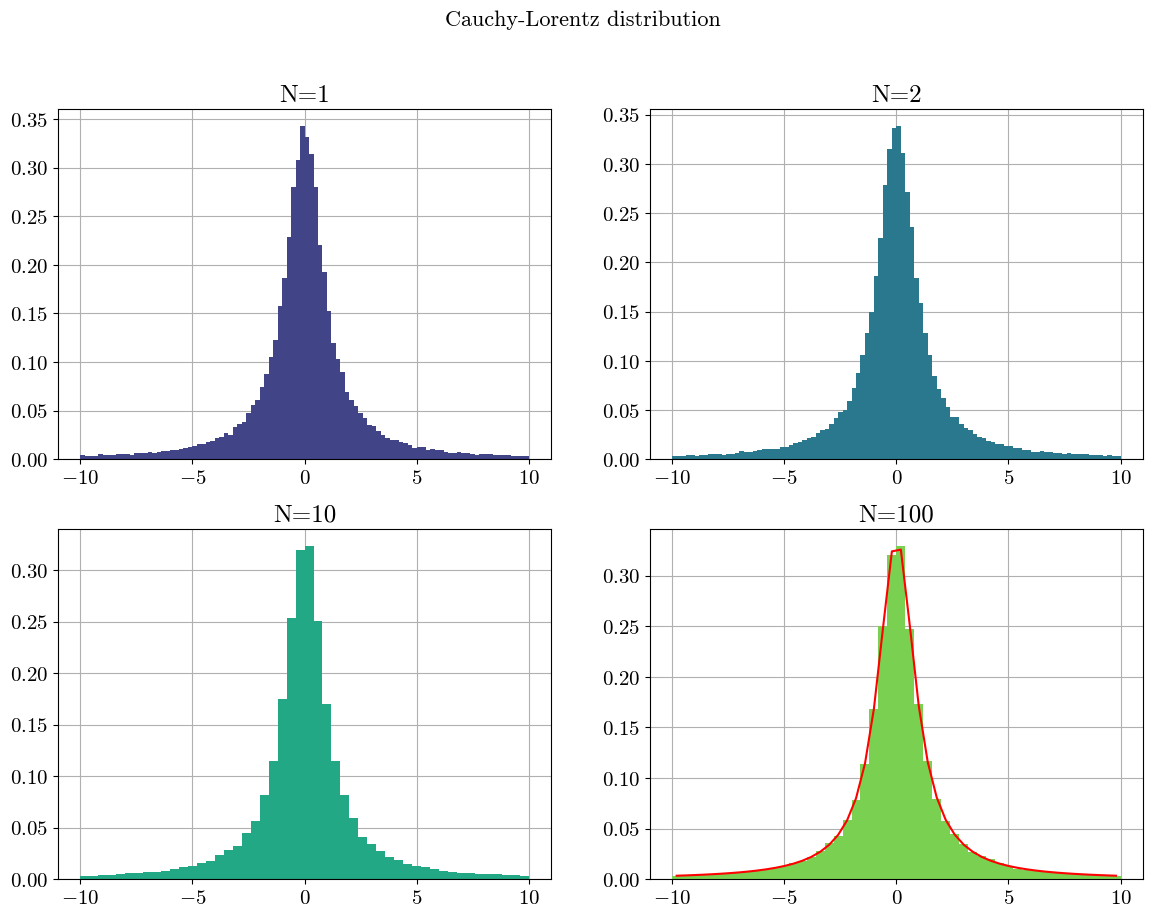

In [45]:
# lorentzian distribution
lor1= histo1[:,2]
lor2 = histo2[:,2]
lor10 = histo10[:,2]
lor100 = histo100[:,2]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Cauchy-Lorentz distribution', fontsize=16, fontweight='bold')

colors = sns.color_palette("viridis", 4)
axs[0,0].hist(lor1, bins=100, color=colors[0], range=(-10, 10), density=True)
axs[0,0].set_title('N=1')
axs[0,0].grid(True)
axs[0,1].hist(lor2, bins=100, color=colors[1], range=(-10, 10),density=True)
axs[0,1].set_title('N=2')
axs[0,1].grid(True)
axs[1,0].hist(lor10, bins=50, color=colors[2], range=(-10, 10),density=True)
axs[1,0].set_title('N=10')
axs[1,0].grid(True)
n3, bins3, _ = axs[1,1].hist(lor100, bins=50, color=colors[3], range=(-10, 10),density=True)
axs[1,1].set_title('N=100')
axs[1,1].grid(True)

#fit lrentziano per N = 100
bin_centers3 = (bins3[:-1] + bins3[1:]) / 2
popt3, pcov3 = curve_fit(lorentziana, bin_centers3, n3)
plt.plot(bin_centers3, lorentziana(bin_centers3, *popt3), color='r', label='fit')
print(popt3)

plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Soluzione: Esperimento di Buffon per valutare $\pi$.

Per estrarre la posizione dell'ago e capire se cade all'interno o se tocca le righe estraiamo innanzitutto la posizione del centro dell'ago ($x$) come numero casuale distribuito uniformemente tra 0 e d/2, dove d è la distanza tra due righe successive e poi l'angolo di inclinazione ($\theta$). Per estrarre l'angolo di inclinazione senza usare $\pi$ estraiamo due numeri casuali nell'intervallo $[-1,1]$ con la condizione che $x^2+y^2 \leq 1$ che rappresentano le coordinate di un punto in un cerchio di raggio 1. Facendo $artan(y/x)$ si trova un angolo distribuito uniformemente tra 0 e $2\pi$. 
Controlliamo se $x \leq \frac{L}{2}sin(\theta)$, dove L = lunghezza dell'ago; in questo modo controlliamo se l'ago tocca la linea.

Estraiamo M volte la posizione dell'ago e ogni volta controlliamo se tocca le righe, dividiamo gli M lanci con i rispettivi esisti in N blocchi e per ogni blocco calcoliamo un valore di pi greco, poi progressivamente facciamo la media e grafichiamo il valor medio ottenuto all'aumentare del numero di blocchi.

``` c++
for(int j = 0; j< N; j++) {
        N_hit = 0;
        for(int k = 0; k < N_throw ; k++) {
            double x = rnd.Rannyu(0,d/2); // x coordinate of the center of the needle
            // angle of the needle
            double x_a, y_a, theta;
            do{
                x_a = rnd.Rannyu(-0.5,0.5);
                y_a = rnd.Rannyu(-0.5,0.5);
                theta = atan(x_a/y_a);
            } while(x_a*x_a+y_a*y_a > 1);

            if(x <= abs(L*sin(theta)/2)) {
                N_hit += 1;
            }
        }
        p[j] = 2*L*N_throw/(N_hit*d); // pi estimation di un blocco
        p_av2[j] = pow(p[j],2);
    }

    auto result = sum_prog(p, p_av2, N);
```

Parametri:

- $M = 10^5$
- $N = 10^3$
- $L = 1$
- $d = 1.5$

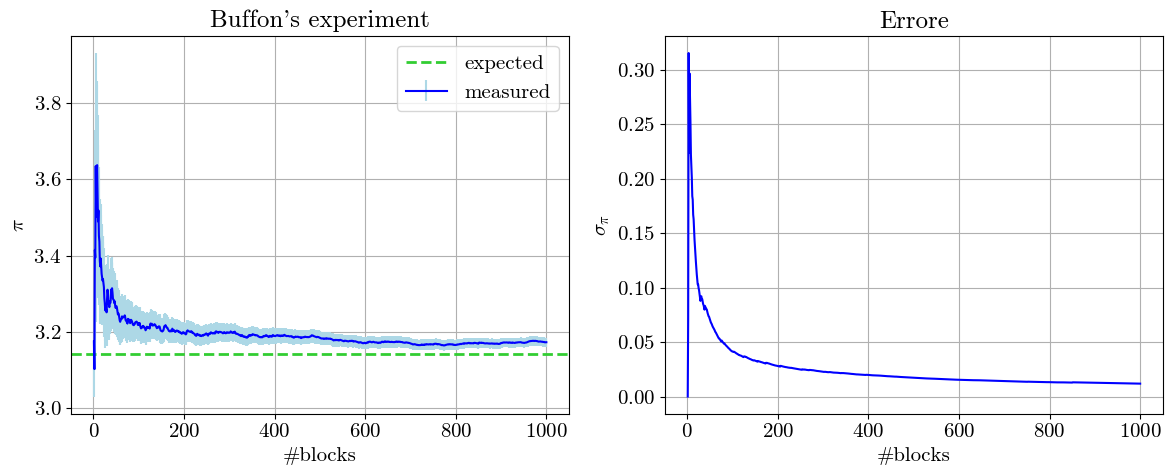

In [47]:
pi_estimation = np.loadtxt("es1_3/pi_estimation.dat")
N = pi_estimation[:,0]
p = pi_estimation[:,1]
err = pi_estimation[:,2]

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("Buffon's experiment")
plt.errorbar(N, p, err, ecolor= 'lightblue' ,color='blue', label = 'measured')
plt.axhline(y=math.pi, color='limegreen', linestyle='--', linewidth =2, label = 'expected')
plt.xlabel('#blocks')
plt.ylabel('$\pi$')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Errore")
plt.plot(N, err, color='blue')
plt.xlabel('#blocks')
plt.ylabel('$\sigma_{\pi}$')
plt.grid(True)

plt.tight_layout()
plt.show()